<p align="center"><h1 align="center">QMSS5074GR <br> Projects in Advanced Machine Learning <br>Fall 2024 <br> FINAL PROJECT<br>Assignment 3 [GROUP Assignment]</h1>

---
<br>

#### (Change Unis in the title of your notebook. The format should be `assignment3_Part1_GRPID_UNI1_UNI2... UNIn.ipynb`)
#### **Your Unis** : Fill Here for all members (Comma separated).
#### **Your Full names** : Fill Here (in same order as UNIs)
#### **Link to your Public Github repository** : Fill here (single link is expected)


## **Stanford Sentiment Treebank - Movie Review Classification**

## Instructions for Part 1 (simple models):
1.   Get data in and set up X_train / X_test / y_train
2.   Preprocess data using Sklearn TFIDF Vectorizer/ Write and Save Preprocessor function
3. Fit model on preprocessed data and save preprocessor function and model
4. Generate predictions from X_test data


### 1. Get dataset in and set up training, validation and test data

In [1]:
# IMPORT DATA
!git clone https://github.com/YJiangcm/SST-2-sentiment-analysis.git

fatal: destination path 'SST-2-sentiment-analysis' already exists and is not an empty directory.


In [2]:
# Set up X_train, X_test, and y_train_labels objects
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import warnings

warnings.simplefilter(action="ignore", category=Warning)

headers = ["sentiment", "review"]

train_df = pd.read_csv("SST-2-sentiment-analysis/data/train.tsv", sep="\t", names=headers)
val_df = pd.read_csv("SST-2-sentiment-analysis/data/dev.tsv", sep="\t", names=headers)
test_df = pd.read_csv("SST-2-sentiment-analysis/data/test.tsv", sep="\t", names=headers)

train_df.head()

,sentiment,review
0,1,"a stirring , funny and finally transporting re..."
1,0,apparently reassembled from the cutting-room f...
2,0,they presume their audience wo n't sit still f...
3,1,this is a visually stunning rumination on love...
4,1,jonathan parker 's bartleby should have been t...


In [3]:
# From train_df
X_train = train_df["review"]
y_train = train_df["sentiment"]

# From val_df
X_val = val_df["review"]
y_val = val_df["sentiment"]

# From test_df
X_test = test_df["review"]
y_test = test_df["sentiment"]

### 2.   Preprocess data and Analyze


In [4]:
# Build a Document-Term Matrix (DTM) out of words in the training set
# Remove stop words that occur too frequently to be useful, and
# Use Term Frequency - Inverse Document Frequency (TF-IDF) formula to weight by how common words are generally

# Code here

tfidf_vectorizer = TfidfVectorizer(stop_words="english")

tfidf_vectorizer.fit(X_train)

X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [5]:
# Write function to transform data with preprocessor
# New samples will be put into a DTM based on vocabularly from training set

# code here


def preprocessor(texts):
    return tfidf_vectorizer.transform(texts)


print(preprocessor(X_train).shape)
print(preprocessor(X_test).shape)

(6920, 13506)
(1821, 13506)


Perform EDA and Visualizations (class balance, review lengths, word frequency per class, Wordcloud, etc)

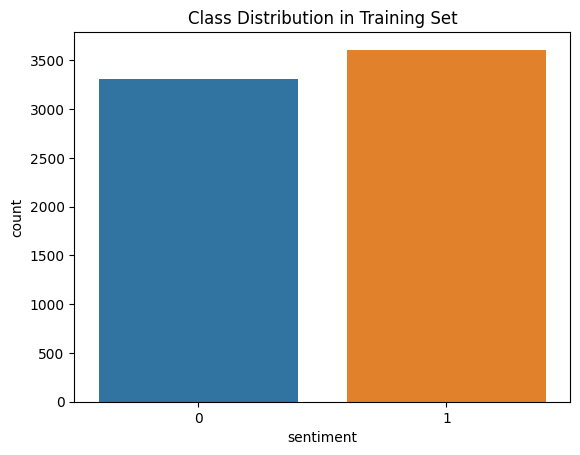

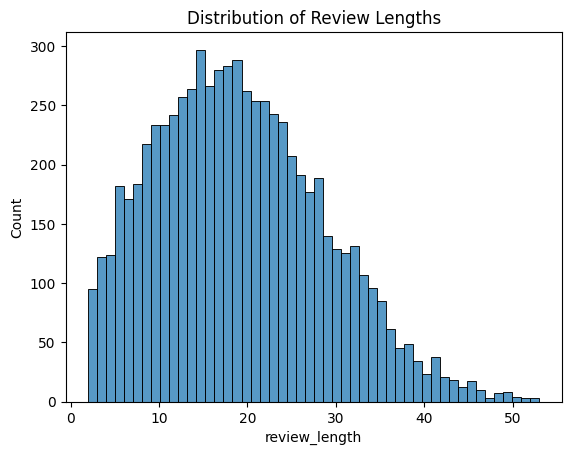

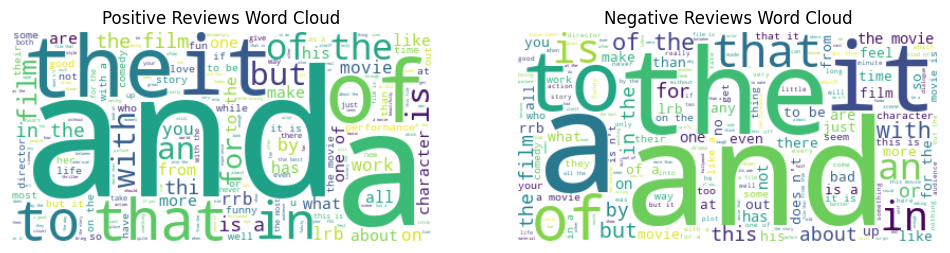

In [6]:
# EDA and Viz code

import matplotlib.pyplot as plt
import seaborn as sns

# Class balance
sns.countplot(x="sentiment", data=train_df)
plt.title("Class Distribution in Training Set")
plt.show()

# Review lengths
train_df["review_length"] = train_df["review"].apply(lambda x: len(x.split()))
sns.histplot(train_df["review_length"], bins=50)
plt.title("Distribution of Review Lengths")
plt.show()

from wordcloud import WordCloud

positive_reviews = " ".join(train_df[train_df["sentiment"] == 1]["review"])
negative_reviews = " ".join(train_df[train_df["sentiment"] == 0]["review"])

wordcloud_pos = WordCloud(stopwords="english", background_color="white").generate(positive_reviews)
wordcloud_neg = WordCloud(stopwords="english", background_color="white").generate(negative_reviews)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Reviews Word Cloud")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Reviews Word Cloud")

plt.show()

If you think lemmatization, stemming and other text preprocessing should be performed, code here. You can also go back and include it in the preprocessing function if you want.

You are also free to include any extra features that you extract from the text to aid in modeling (Optional)

In [7]:
# additional preprocessing

### 3. Fit model on preprocessed data


In [8]:
from sklearn.ensemble import RandomForestClassifier

# Code Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

### 4. Generate predictions from X_test data and calculate accuracy


In [9]:
# Code here
from sklearn.metrics import accuracy_score

y_pred_test = rf_model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.7369577155409116


### 5. Repeat the above process with different models


In [10]:
# Model 2 - Re fit a better RF model
from sklearn.ensemble import RandomForestClassifier

rf_model2 = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model2.fit(X_train_tfidf, y_train)
y_pred2 = rf_model2.predict(X_test_tfidf)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Test Accuracy (Model 2):", accuracy2)

Test Accuracy (Model 2): 0.7446457990115322


In [11]:
# Create a third model using GridSearchCV

from sklearn.model_selection import GridSearchCV
import numpy as np

# Do grid search over atleast 2 hyperparams of RF and get your best model

# extract and print best score and parameters

param_grid = {
    "n_estimators": [50, 100, 150, 200],
    "max_depth": [None, 10, 20],
    "max_features": ["sqrt", "log2"],
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train_tfidf, y_train)

print("Best Score:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred3 = best_rf.predict(X_test_tfidf)
accuracy3 = accuracy_score(y_test, y_pred3)
print("Test Accuracy (Model 3):", accuracy3)

Best Score: 0.7439301656546883
Best Parameters: {'max_depth': None, 'max_features': 'log2', 'n_estimators': 200}
Test Accuracy (Model 3): 0.785831960461285


In [12]:
# Here are several classic ML architectures you can choose from to experiment with next:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier


## Experiment with atleast 3 different models from above imports

# Model 4 - KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_tfidf, y_train)
y_pred4 = knn_model.predict(X_test_tfidf)
accuracy4 = accuracy_score(y_test, y_pred4)
print("Test Accuracy (KNN):", accuracy4)

# Model 5 - SVC
svm_model = SVC(kernel="linear")
svm_model.fit(X_train_tfidf, y_train)
y_pred5 = svm_model.predict(X_test_tfidf)
accuracy5 = accuracy_score(y_test, y_pred5)
print("Test Accuracy (SVC):", accuracy5)


# Model 6: Gradient Boosting Classifier
gbc_model = GradientBoostingClassifier(random_state=42)
gbc_model.fit(X_train_tfidf, y_train)
y_pred6 = gbc_model.predict(X_test_tfidf)
accuracy6 = accuracy_score(y_test, y_pred6)
print("Test Accuracy (GBC):", accuracy6)

# Model 7 - Bagging
bagging_model = BaggingClassifier(random_state=42)
bagging_model.fit(X_train_tfidf, y_train)
y_pred7 = bagging_model.predict(X_test_tfidf)
accuracy7 = accuracy_score(y_test, y_pred7)
print("Test Accuracy (Bagging):", accuracy7)

Test Accuracy (KNN): 0.5085118066996156
Test Accuracy (SVC): 0.8012081274025261
Test Accuracy (GBC): 0.6496430532674354
Test Accuracy (Bagging): 0.6930258099945085


Tabularize your results and compare them here:

In [13]:
# code here

results = pd.DataFrame(
    {
        "Model": ["RF", "RF2", "RF3", "KNN", "SVC", "GBC", "Bagging"],
        "Accuracy": [accuracy, accuracy2, accuracy3, accuracy4, accuracy5, accuracy6, accuracy7],
    }
)

print(results)

     Model  Accuracy
0       RF  0.736958
1      RF2  0.744646
2      RF3  0.785832
3      KNN  0.508512
4      SVC  0.801208
5      GBC  0.649643
6  Bagging  0.693026


### Discuss which models performed better and why?

--- Discussion here ---

The SVC model achieved the highest accuracy (80.12%) among the classic machine learning models, outperforming Random Forest and other ensemble methods. This strong performance likely stems from the SVC's ability to effectively handle high-dimensional data produced by the TF-IDF vectorization. The linear kernel used in the SVC appears well-suited to the linearly separable nature of the data after transformation. Furthermore, SVMs are less prone to overfitting in high-dimensional spaces compared to some other algorithms, which could explain its superior performance on this dataset.

## Instructions for Part 2 (neural networks):
1.   Get data in and set up X_train / X_test / y_train
2.   Preprocess data using keras Tokenizer
3. Fit model on preprocessed data
4. Generate predictions from X_test data


### 1.   Load Data


In [14]:
# Set up X_train, X_test, and y_train_labels objects
import pandas as pd
import warnings

warnings.simplefilter(action="ignore", category=Warning)


# From train_df
X_train = train_df["review"]
y_train = train_df["sentiment"]

# From val_df
X_val = val_df["review"]
y_val = val_df["sentiment"]

# From test_df
X_test = test_df["review"]
y_test = test_df["sentiment"]

X_train.head()

0    a stirring , funny and finally transporting re...
1    apparently reassembled from the cutting-room f...
2    they presume their audience wo n't sit still f...
3    this is a visually stunning rumination on love...
4    jonathan parker 's bartleby should have been t...
Name: review, dtype: object

### 2.   Preprocess data using keras tokenizer


In [15]:
# This preprocessor function makes use of the tf.keras tokenizer

import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH']='true'

from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
import numpy as np

# Build vocabulary from training text data
vocab_size = 10000
max_length = 100

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train)

# preprocessor tokenizes words and makes sure all documents have the same length (perform padding with maxlen=100)


def preprocessor(texts):
    sequences = tokenizer.texts_to_sequences(texts)
    padded = pad_sequences(sequences, maxlen=max_length)
    return padded


X_train_seq = preprocessor(X_train)
X_test_seq = preprocessor(X_test)
X_val_seq = preprocessor(X_val)


print(preprocessor(X_train).shape)
print(preprocessor(X_test).shape)

(6920, 100)
(1821, 100)


### 3. Fit model on preprocessed data


In [16]:
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.models import Sequential

# A basic deep learning model (max 5 layers)

model_nn = Sequential(
    [
        Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
        Flatten(),
        Dense(64, activation="relu"),
        Dense(1, activation="sigmoid"),
    ]
)

model_nn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Use validation data here
history_nn = model_nn.fit(X_train_seq, y_train, epochs=5, batch_size=64, validation_data=(X_val_seq, y_val))

Epoch 1/5


I0000 00:00:1733195317.094865    5851 service.cc:145] XLA service 0x7cf4c8018ca0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733195317.094920    5851 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 71/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5098 - loss: 0.6988

I0000 00:00:1733195317.636953    5851 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5145 - loss: 0.6970 - val_accuracy: 0.5585 - val_loss: 0.6794
Epoch 2/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7713 - loss: 0.6129 - val_accuracy: 0.7810 - val_loss: 0.4782
Epoch 3/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9388 - loss: 0.2128 - val_accuracy: 0.7569 - val_loss: 0.5368
Epoch 4/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9969 - loss: 0.0277 - val_accuracy: 0.7626 - val_loss: 0.6108
Epoch 5/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9991 - loss: 0.0080 - val_accuracy: 0.7443 - val_loss: 0.6940


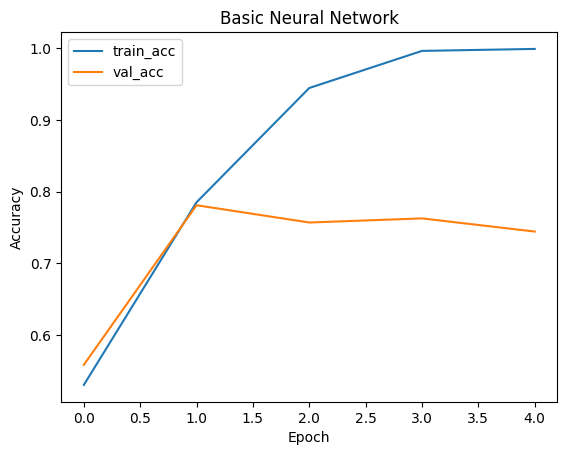

In [17]:
# Plot history
import matplotlib.pyplot as plt


def plot_results(history, title="Model Accuracy"):
    plt.plot(history.history["accuracy"], label="train_acc")
    plt.plot(history.history["val_accuracy"], label="val_acc")
    plt.title(title)
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend()
    plt.show()


plot_results(history_nn, "Basic Neural Network")

### 4. Generate predictions from X_test data and calculate accuracy


In [18]:
# Code Here
from sklearn.metrics import accuracy_score


def get_acc(model):
    y_pred = model.predict(X_test_seq)
    y_pred = (y_pred > 0.5).astype("int32")
    acc = accuracy_score(y_test, y_pred)
    return acc


accuracy_nn = get_acc(model_nn)
print("Test Accuracy (Neural Network):", accuracy_nn)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test Accuracy (Neural Network): 0.7732015376166941


### 5. Experiment with more models


Epoch 1/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.5628 - loss: 0.6668 - val_accuracy: 0.7076 - val_loss: 0.6107
Epoch 2/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8552 - loss: 0.3497 - val_accuracy: 0.7901 - val_loss: 0.4760
Epoch 3/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9415 - loss: 0.1623 - val_accuracy: 0.7993 - val_loss: 0.5992
Epoch 4/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9695 - loss: 0.0910 - val_accuracy: 0.7706 - val_loss: 0.7309
Epoch 5/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9868 - loss: 0.0474 - val_accuracy: 0.7764 - val_loss: 0.8214
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Test Accuracy (LSTM): 0.786381109280615


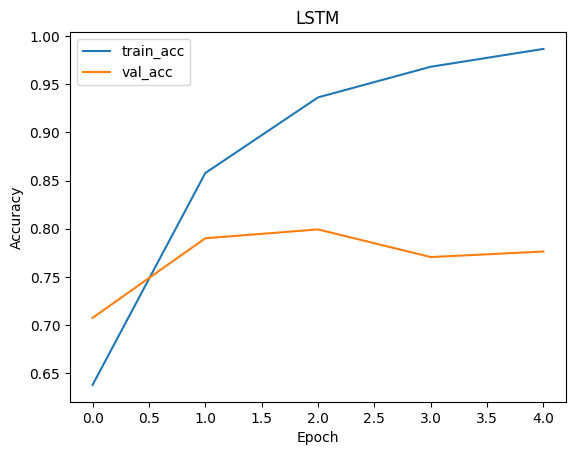

In [19]:
# Train model 2 using same preprocessor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Flatten

# Code an model with atleast 3 LSTM layers (with Embedding Layer)

model_lstm = Sequential(
    [
        Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
        LSTM(128, return_sequences=True),
        LSTM(64, return_sequences=True),
        LSTM(32),
        Dense(1, activation="sigmoid"),
    ]
)

model_lstm.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history_lstm = model_lstm.fit(X_train_seq, y_train, epochs=5, batch_size=64, validation_data=(X_val_seq, y_val))

accuracy_lstm = get_acc(model_lstm)
print("Test Accuracy (LSTM):", accuracy_lstm)

plot_results(history_lstm, "LSTM")

Does your model perform better or worse than your prior deep learning model? Why might that be the case?

--- Answer Here ---

The LSTM model performs better than the basic deep learning model, but the improvement is not substantial. While LSTMs are designed for sequential data and can capture contextual information that a basic feedforward network misses, the relatively small gain suggests that either the sequential information isn't crucial for this specific task, or the LSTM model isn't effectively leveraging it. It's possible that the dataset's short review lengths limit the LSTM's ability to capture long-range dependencies, or that further hyperparameter tuning is needed to optimize the LSTM's performance.

### 6. Tune model within range of hyperparameters with Keras Tuner

*Consult [documentation](https://keras.io/guides/keras_tuner/getting_started/) to see full functionality.*

In [20]:
! pip install keras_tuner

In [21]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Flatten
import keras_tuner as kt

# Define model structure & parameter search space with a function
# code LSTM--based model with provision for searching hyperparameter space, return model


# initialize the keras search tuner (which will search through parameters)
# Define the following:
# Your function that returns the model
# objective to optimize
# max number of trials to run during search
# higher number reduces variance of results; guages model performance more accurately


# Run the tuner feeding it the validation data


def build_model(hp):
    model = Sequential()
    embedding_dim = hp.Int("embedding_dim", min_value=32, max_value=256, step=32)
    model.add(
        Embedding(
            input_dim=vocab_size,
            output_dim=embedding_dim,
            input_length=max_length,
        )
    )

    lstm_units = hp.Int("lstm_units", min_value=32, max_value=256, step=32)
    for i in range(hp.Int("num_layers", 1, 3)):
        model.add(LSTM(units=lstm_units, return_sequences=True))
    model.add(Flatten())
    model.add(Dense(1, activation="sigmoid"))

    learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )
    return model


# Initialize tuner
tuner = kt.Hyperband(
    build_model,
    objective="val_accuracy",
    max_epochs=10,
    factor=3,
    directory="keras_tuner",
    project_name="sentiment_analysis",
)

# Search for best hyperparameters
tuner.search(
    X_train_seq,
    y_train,
    epochs=10,
    validation_data=(X_val_seq, y_val),
    callbacks=[keras.callbacks.EarlyStopping(patience=2)],
)

Reloading Tuner from keras_tuner/sentiment_analysis/tuner0.json


In [22]:
# Get the top 2 hyperparameters.

best_hps = tuner.get_best_hyperparameters(num_trials=2)
print("Best hyperparameters:")
for i, hp in enumerate(best_hps):
    print(f"\nModel {i+1}:")
    print(f"Embedding dim: {hp.get('embedding_dim')}")
    print(f"Number of LSTM layers: {hp.get('num_layers')}")
    print(f"LSTM units: {hp.get('lstm_units')}")
    print(f"Learning rate: {hp.get('learning_rate')}")


# Build model with best hyperparameters
model_tuned = tuner.hypermodel.build(best_hps[0])

# Fit with the entire dataset.
history_tuned = model_tuned.fit(
    X_train_seq,
    y_train,
    epochs=10,
    validation_data=(X_val_seq, y_val),
    callbacks=[keras.callbacks.EarlyStopping(patience=2)],
)

Best hyperparameters:

Model 1:
Embedding dim: 32
Number of LSTM layers: 3
LSTM units: 64
Learning rate: 0.0001

Model 2:
Embedding dim: 32
Number of LSTM layers: 3
LSTM units: 32
Learning rate: 0.01
Epoch 1/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.5202 - loss: 0.6928 - val_accuracy: 0.5092 - val_loss: 0.6929
Epoch 2/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5303 - loss: 0.6914 - val_accuracy: 0.5356 - val_loss: 0.6816
Epoch 3/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.6342 - loss: 0.6361 - val_accuracy: 0.7122 - val_loss: 0.5748
Epoch 4/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.7838 - loss: 0.4573 - val_accuracy: 0.7626 - val_loss: 0.5493
Epoch 5/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8478 - loss: 0.3471 - val_accuracy: 0.7798 - val_loss: 0.5612
Epoch 6/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8830 - loss: 0.2733 - val_accuracy: 0.7856 - val_loss: 0.6475


What were the best hyperparameters found? Why might that be performing better than others?

--- Answer Here ---

In [23]:
# Submit Model 3:

# -- Generate predicted y values (Model 3)
accuracy_tuned = get_acc(model_tuned)
print("Test Accuracy (Tuned LSTM):", accuracy_tuned)

# extract correct prediction labels


# Submit Model 1 to Competition Leaderboard

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Test Accuracy (Tuned LSTM): 0.7512355848434926


## 3 more models

Train three more prediction models to try to predict the SST sentiment
dataset well.

○ Use Conv1d layers in first model

○ Use Transfer learning with Glove Embeddings for 2nd model

○ Third model can be any Transfer learning model of your choice (Transformer architecture required, eg. BERT and related)

In [24]:
# Model 1

from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D

model_conv1d = Sequential(
    [
        Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
        Conv1D(filters=128, kernel_size=5, activation="relu"),
        GlobalMaxPooling1D(),
        Dense(1, activation="sigmoid"),
    ]
)

# Compile model
model_conv1d.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Fit model
history_conv1d = model_conv1d.fit(X_train_seq, y_train, epochs=5, batch_size=64, validation_data=(X_val_seq, y_val))

# Evaluate
accuracy_conv1d = get_acc(model_conv1d)
print("Test Accuracy (Conv1D Model):", accuracy_conv1d)

Epoch 1/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5628 - loss: 0.6778 - val_accuracy: 0.7672 - val_loss: 0.5128
Epoch 2/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8401 - loss: 0.4047 - val_accuracy: 0.7993 - val_loss: 0.4326
Epoch 3/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9450 - loss: 0.1653 - val_accuracy: 0.8028 - val_loss: 0.4928
Epoch 4/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9821 - loss: 0.0717 - val_accuracy: 0.7867 - val_loss: 0.5864
Epoch 5/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9939 - loss: 0.0314 - val_accuracy: 0.7878 - val_loss: 0.6724
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Test Accuracy (Conv1D Model): 0.7951674903898956


In [25]:
# !wget http://nlp.stanford.edu/data/wordvecs/glove.6B.zip
# !unzip glove.6B.zip

In [26]:
# Model 2

# Load GloVe embeddings
embeddings_index = {}
with open("glove.6B.100d.txt", encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype="float32")
        embeddings_index[word] = coefs

# Prepare embedding matrix
embedding_dim = 100
word_index = tokenizer.word_index
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    if i >= vocab_size:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Build the model
model_glove = Sequential(
    [
        Embedding(
            input_dim=vocab_size,
            output_dim=embedding_dim,
            weights=[embedding_matrix],
            input_length=max_length,
            trainable=False,
        ),
        LSTM(64, return_sequences=True),
        LSTM(32),
        Dense(1, activation="sigmoid"),
    ]
)


# Compile model
model_glove.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Fit model
history_glove = model_glove.fit(X_train_seq, y_train, epochs=5, batch_size=64, validation_data=(X_val_seq, y_val))

# Evaluate
accuracy_glove = get_acc(model_glove)
print("Test Accuracy (GloVe Model):", accuracy_glove)

Epoch 1/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6234 - loss: 0.6408 - val_accuracy: 0.7580 - val_loss: 0.5126
Epoch 2/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7402 - loss: 0.5282 - val_accuracy: 0.7833 - val_loss: 0.4773
Epoch 3/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7732 - loss: 0.4772 - val_accuracy: 0.7615 - val_loss: 0.4869
Epoch 4/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7800 - loss: 0.4647 - val_accuracy: 0.7947 - val_loss: 0.4839
Epoch 5/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8104 - loss: 0.4083 - val_accuracy: 0.8131 - val_loss: 0.4400
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Test Accuracy (GloVe Model): 0.7896760021965953


In [27]:
!pip install datasets

In [28]:
# Model 3

from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset

# Convert data to Hugging Face Dataset format
train_data = Dataset.from_pandas(pd.DataFrame({"text": X_train, "label": y_train}))
test_data = Dataset.from_pandas(pd.DataFrame({"text": X_test, "label": y_test}))

# Tokenize Data
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")


def tokenize_func(examples):
    return tokenizer(examples["text"], truncation=True, padding="max_length", max_length=max_length)


train_data = train_data.map(tokenize_func, batched=True)
test_data = test_data.map(tokenize_func, batched=True)

# Load Pre-trained Model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# Training Arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    report_to="none",
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=test_data,
)

# Train Model
trainer.train()

# Evaluate
y_pred_bert_prob = trainer.predict(test_data).predictions
y_pred_bert = (y_pred_bert_prob.argmax(-1)).astype("int32")
accuracy_bert = accuracy_score(y_test, y_pred_bert)
print("Test Accuracy (BERT Model):", accuracy_bert)

Map:   0%|          | 0/6920 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,No log,0.252854
2,No log,0.228167
3,No log,0.246463


Test Accuracy (BERT Model): 0.914881933003844


Tabularize results from ALL your models in this notebook and compare performance

In [29]:
results = {
    "Model": ["Basic Neural Network", "LSTM", "Tuned LSTM", "Conv1D", "GloVe+LSTM", "BERT"],
    "Test Accuracy": [accuracy_nn, accuracy_lstm, accuracy_tuned, accuracy_conv1d, accuracy_glove, accuracy_bert],
}

results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(results_df.to_string(index=False))


Model Performance Comparison:
               Model  Test Accuracy
Basic Neural Network       0.773202
                LSTM       0.786381
          Tuned LSTM       0.751236
              Conv1D       0.795167
          GloVe+LSTM       0.789676
                BERT       0.914882


Results Discussion : Point out why specific models may have performed better than others. and discuss failures if any.

# **Discussion:**

Among the deep learning models, BERT significantly outperformed all others, demonstrating the power of transformer architectures and pre-training for sentiment analysis. Its ability to capture complex linguistic relationships likely contributed to its high accuracy. While the LSTM architecture showed a marginal improvement over the basic feedforward network, the gains were not substantial, suggesting that the sequential nature of LSTMs might not be fully exploited in this context, or that the dataset's characteristics limit the benefits of long-range dependency modeling. The tuned LSTM did not yield significant improvement, indicating potentially well-chosen initial hyperparameters or an insufficient tuning process. The Conv1D and GloVe-embedded LSTM models performed comparably to the standard LSTM, suggesting that while convolutional layers and pre-trained embeddings can be useful, they did not offer a substantial advantage for this specific task.